In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import tensorflow as tf

from src.DataPreprocessor.data_preprocessor import DataPreprocessor, Mode
from src.LearningKeras.net_architecture import cnn_150x150x5
from src.LearningKeras.train import KerasTrainer

from tqdm import trange

np.random.seed(1)
tf.set_random_seed(2)

In [2]:
from src.DataPreprocessor.DataIOBackend.gdal_backend import GdalBackend
from src.DataPreprocessor.data_visualiser import DataVisualiser

dataiobackend = GdalBackend()
data_preprocessor = DataPreprocessor(data_dir="data/Region 1 - Lopukangri/",
                              backend=dataiobackend,
                              filename_prefix="tibet",
                              mode=Mode.TRAIN,
                              seed=1)

In [ ]:
model_generator = lambda: cnn_150x150x5()
ensemble_size = 5
batch_size = 5

trainer = KerasTrainer(model_generator=model_generator,
                       ensemble_size=ensemble_size,
                       data_preprocessor=data_preprocessor,
                       batch_size=batch_size)

In [4]:
data_preprocessor_muga_puruo = DataPreprocessor(data_dir="data/Region 2 - Muga Puruo/",
                              backend=dataiobackend,
                              filename_prefix="mpgr",
                              mode=Mode.TEST,
                              seed=1)

Driver: GTiff/GeoTIFF
Size is 3333 x 3333 x 1
Projection is PROJCS["WGS 84 / UTM zone 46N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32646"]]
Origin = (175000.0, 3899990.0)
Pixel Size = (30.0, -30.0)


In [8]:
res_muga_puruo = trainer.apply_for_sliding_window(data_preprocessor_muga_puruo, stride=10, max_output_size=50)

  0%|          | 0/5 [00:00<?, ?it/s]
0it [00:00, ?it/s]
2it [00:00, 17.54it/s]
5it [00:00, 20.16it/s]
8it [00:00, 20.97it/s]
11it [00:00, 21.62it/s]
14it [00:00, 21.92it/s]
17it [00:00, 22.11it/s]
20it [00:00, 22.17it/s]
23it [00:01, 22.33it/s]
26it [00:01, 22.26it/s]
29it [00:01, 22.15it/s]
32it [00:01, 22.17it/s]
35it [00:01, 22.28it/s]
38it [00:01, 22.40it/s]
41it [00:01, 22.51it/s]
44it [00:01, 22.61it/s]
47it [00:02, 22.61it/s]
50it [00:02, 22.71it/s]
53it [00:02, 22.77it/s]
56it [00:02, 22.78it/s]
59it [00:02, 22.71it/s]
62it [00:02, 22.73it/s]
65it [00:02, 22.66it/s]
68it [00:03, 22.56it/s]
71it [00:03, 22.53it/s]
74it [00:03, 22.47it/s]
77it [00:03, 22.33it/s]
80it [00:03, 22.24it/s]
83it [00:03, 22.17it/s]
86it [00:03, 22.12it/s]
89it [00:04, 22.06it/s]
92it [00:04, 22.11it/s]
95it [00:04, 22.17it/s]
98it [00:04, 22.23it/s]
101it [00:04, 22.27it/s]
104it [00:04, 22.31it/s]
107it [00:04, 22.34it/s]
110it [00:04, 22.38it/s]
113it [00:05, 22.43it/s]
116it [00:05, 22.47it/s]
119i

box: [[1300, 2800, 1450, 2950]]
box: [[1300, 2900, 1450, 3050]]
box: [[1000, 500, 1150, 650]]
box: [[1300, 2700, 1450, 2850]]
box: [[1700, 2900, 1850, 3050]]
box: [[1300, 3000, 1450, 3150]]
box: [[1200, 2800, 1350, 2950]]
box: [[1700, 3000, 1850, 3150]]
box: [[1400, 2700, 1550, 2850]]
box: [[1200, 2700, 1350, 2850]]
box: [[1300, 2600, 1450, 2750]]
box: [[1200, 2900, 1350, 3050]]
box: [[1200, 3000, 1350, 3150]]
box: [[1200, 2500, 1350, 2650]]
box: [[1700, 2800, 1850, 2950]]
box: [[1200, 2600, 1350, 2750]]
box: [[1600, 2900, 1750, 3050]]
box: [[1600, 2700, 1750, 2850]]
box: [[0, 3000, 150, 3150]]
box: [[1100, 2700, 1250, 2850]]
box: [[1600, 2800, 1750, 2950]]
box: [[1400, 2800, 1550, 2950]]
box: [[0, 2900, 150, 3050]]
box: [[1200, 3100, 1350, 3250]]
box: [[1100, 2600, 1250, 2750]]
box: [[1600, 3000, 1750, 3150]]
box: [[0, 2800, 150, 2950]]
box: [[0, 2500, 150, 2650]]
box: [[1400, 2600, 1550, 2750]]
box: [[0, 2600, 150, 2750]]
box: [[1300, 2500, 1450, 2650]]
box: [[1100, 2800, 1250, 2950]

 20%|██        | 1/5 [00:44<02:56, 44.22s/it]
0it [00:00, ?it/s]
2it [00:00, 18.74it/s]
5it [00:00, 21.76it/s]
8it [00:00, 22.93it/s]
11it [00:00, 23.25it/s]
14it [00:00, 23.55it/s]
17it [00:00, 23.78it/s]
20it [00:00, 23.94it/s]
23it [00:00, 24.03it/s]
26it [00:01, 24.09it/s]
29it [00:01, 24.17it/s]
32it [00:01, 24.18it/s]
35it [00:01, 24.18it/s]
38it [00:01, 24.18it/s]
41it [00:01, 24.26it/s]
44it [00:01, 24.30it/s]
47it [00:01, 24.27it/s]
50it [00:02, 24.32it/s]
53it [00:02, 24.33it/s]
56it [00:02, 24.35it/s]
59it [00:02, 24.37it/s]
62it [00:02, 24.40it/s]
65it [00:02, 24.43it/s]
68it [00:02, 24.45it/s]
71it [00:02, 24.45it/s]
74it [00:03, 24.43it/s]
77it [00:03, 24.44it/s]
80it [00:03, 24.45it/s]
83it [00:03, 24.45it/s]
86it [00:03, 24.46it/s]
89it [00:03, 24.48it/s]
92it [00:03, 24.50it/s]
95it [00:03, 24.51it/s]
98it [00:03, 24.53it/s]
101it [00:04, 24.53it/s]
104it [00:04, 24.54it/s]
107it [00:04, 24.54it/s]
110it [00:04, 24.53it/s]
113it [00:04, 24.54it/s]
116it [00:04, 24.51it

box: [[1400, 2800, 1550, 2950]]
box: [[1300, 3000, 1450, 3150]]
box: [[0, 3000, 150, 3150]]
box: [[1700, 3000, 1850, 3150]]
box: [[1300, 3100, 1450, 3250]]
box: [[1400, 2900, 1550, 3050]]
box: [[1500, 600, 1650, 750]]
box: [[1900, 3000, 2050, 3150]]
box: [[1200, 2500, 1350, 2650]]
box: [[1600, 3100, 1750, 3250]]
box: [[200, 2800, 350, 2950]]
box: [[1100, 2700, 1250, 2850]]
box: [[1700, 2900, 1850, 3050]]
box: [[1100, 2900, 1250, 3050]]
box: [[1300, 2900, 1450, 3050]]
box: [[100, 2800, 250, 2950]]
box: [[1600, 3000, 1750, 3150]]
box: [[1200, 3000, 1350, 3150]]
box: [[100, 2300, 250, 2450]]
box: [[100, 3000, 250, 3150]]
box: [[1200, 2900, 1350, 3050]]
box: [[1200, 2700, 1350, 2850]]
box: [[100, 2900, 250, 3050]]
box: [[1200, 3100, 1350, 3250]]
box: [[1200, 2800, 1350, 2950]]
box: [[0, 2600, 150, 2750]]
box: [[100, 2700, 250, 2850]]
box: [[200, 2400, 350, 2550]]
box: [[1300, 2800, 1450, 2950]]
box: [[1300, 2700, 1450, 2850]]
box: [[1400, 2700, 1550, 2850]]
box: [[800, 2000, 950, 2150]]
bo

 40%|████      | 2/5 [01:27<02:11, 43.74s/it]
0it [00:00, ?it/s]
2it [00:00, 17.58it/s]
5it [00:00, 20.75it/s]
8it [00:00, 22.22it/s]
11it [00:00, 22.88it/s]
14it [00:00, 23.37it/s]
17it [00:00, 23.71it/s]
20it [00:00, 23.86it/s]
23it [00:00, 24.06it/s]
26it [00:01, 24.18it/s]
29it [00:01, 24.28it/s]
32it [00:01, 24.35it/s]
35it [00:01, 24.42it/s]
38it [00:01, 24.48it/s]
41it [00:01, 24.47it/s]
44it [00:01, 24.49it/s]
47it [00:01, 24.53it/s]
50it [00:02, 24.55it/s]
53it [00:02, 24.60it/s]
56it [00:02, 24.57it/s]
59it [00:02, 24.60it/s]
62it [00:02, 24.65it/s]
65it [00:02, 24.67it/s]
68it [00:02, 24.67it/s]
71it [00:02, 24.70it/s]
74it [00:02, 24.70it/s]
77it [00:03, 24.73it/s]
80it [00:03, 24.72it/s]
83it [00:03, 24.70it/s]
86it [00:03, 24.72it/s]
89it [00:03, 24.73it/s]
92it [00:03, 24.74it/s]
95it [00:03, 24.75it/s]
98it [00:03, 24.76it/s]
101it [00:04, 24.77it/s]
104it [00:04, 24.78it/s]
107it [00:04, 24.80it/s]
110it [00:04, 24.81it/s]
113it [00:04, 24.81it/s]
116it [00:04, 24.81it

box: [[1700, 2900, 1850, 3050]]
box: [[1300, 2900, 1450, 3050]]
box: [[1200, 2800, 1350, 2950]]
box: [[1700, 3000, 1850, 3150]]
box: [[1200, 2700, 1350, 2850]]
box: [[1300, 2700, 1450, 2850]]
box: [[1300, 2800, 1450, 2950]]
box: [[1300, 2600, 1450, 2750]]
box: [[1300, 3000, 1450, 3150]]
box: [[1200, 2900, 1350, 3050]]
box: [[1200, 3000, 1350, 3150]]
box: [[1200, 2600, 1350, 2750]]
box: [[1600, 2900, 1750, 3050]]
box: [[1600, 2800, 1750, 2950]]
box: [[1200, 2500, 1350, 2650]]
box: [[1600, 2700, 1750, 2850]]
box: [[0, 2900, 150, 3050]]
box: [[1100, 2700, 1250, 2850]]
box: [[1700, 2800, 1850, 2950]]
box: [[0, 3000, 150, 3150]]
box: [[0, 2800, 150, 2950]]
box: [[0, 2500, 150, 2650]]
box: [[0, 2600, 150, 2750]]
box: [[1400, 2700, 1550, 2850]]
box: [[0, 2700, 150, 2850]]
box: [[100, 2800, 250, 2950]]
box: [[1100, 2600, 1250, 2750]]
box: [[1100, 2800, 1250, 2950]]
box: [[1200, 3100, 1350, 3250]]
box: [[100, 2600, 250, 2750]]
box: [[1600, 3000, 1750, 3150]]
box: [[100, 2700, 250, 2850]]
box: [

 60%|██████    | 3/5 [02:10<01:26, 43.45s/it]
0it [00:00, ?it/s]
2it [00:00, 16.72it/s]
5it [00:00, 20.81it/s]
8it [00:00, 22.23it/s]
11it [00:00, 22.93it/s]
14it [00:00, 23.28it/s]
17it [00:00, 23.47it/s]
20it [00:00, 23.61it/s]
23it [00:00, 23.78it/s]
26it [00:01, 23.93it/s]
29it [00:01, 24.00it/s]
32it [00:01, 24.04it/s]
35it [00:01, 24.16it/s]
38it [00:01, 24.19it/s]
41it [00:01, 24.26it/s]
44it [00:01, 24.30it/s]
47it [00:01, 24.32it/s]
50it [00:02, 24.31it/s]
53it [00:02, 24.33it/s]
56it [00:02, 24.38it/s]
59it [00:02, 24.39it/s]
62it [00:02, 24.35it/s]
65it [00:02, 24.38it/s]
68it [00:02, 24.40it/s]
71it [00:02, 24.37it/s]
74it [00:03, 24.33it/s]
77it [00:03, 24.35it/s]
80it [00:03, 24.37it/s]
83it [00:03, 24.39it/s]
86it [00:03, 24.39it/s]
89it [00:03, 24.38it/s]
92it [00:03, 24.38it/s]
95it [00:03, 24.38it/s]
98it [00:04, 24.38it/s]
101it [00:04, 24.41it/s]
104it [00:04, 24.41it/s]
107it [00:04, 24.43it/s]
110it [00:04, 24.43it/s]
113it [00:04, 24.44it/s]
116it [00:04, 24.44it

box: [[1300, 2800, 1450, 2950]]
box: [[1300, 2700, 1450, 2850]]
box: [[1300, 2900, 1450, 3050]]
box: [[1700, 2900, 1850, 3050]]
box: [[1200, 2800, 1350, 2950]]
box: [[1300, 2600, 1450, 2750]]
box: [[1400, 2700, 1550, 2850]]
box: [[1200, 2700, 1350, 2850]]
box: [[1300, 3000, 1450, 3150]]
box: [[1700, 3000, 1850, 3150]]
box: [[1200, 2600, 1350, 2750]]
box: [[1200, 3000, 1350, 3150]]
box: [[1700, 2800, 1850, 2950]]
box: [[1200, 2500, 1350, 2650]]
box: [[1200, 2900, 1350, 3050]]
box: [[1600, 2800, 1750, 2950]]
box: [[1600, 2900, 1750, 3050]]
box: [[1600, 2700, 1750, 2850]]
box: [[1100, 2700, 1250, 2850]]
box: [[0, 2900, 150, 3050]]
box: [[0, 3000, 150, 3150]]
box: [[1400, 2800, 1550, 2950]]
box: [[1400, 2600, 1550, 2750]]
box: [[0, 2800, 150, 2950]]
box: [[1300, 2500, 1450, 2650]]
box: [[1100, 2600, 1250, 2750]]
box: [[0, 2500, 150, 2650]]
box: [[1100, 2800, 1250, 2950]]
box: [[1200, 3100, 1350, 3250]]
box: [[100, 2800, 250, 2950]]
box: [[0, 2600, 150, 2750]]
box: [[100, 2600, 250, 2750]]


 80%|████████  | 4/5 [02:53<00:43, 43.40s/it]
0it [00:00, ?it/s]
2it [00:00, 15.20it/s]
5it [00:00, 19.63it/s]
8it [00:00, 21.28it/s]
11it [00:00, 21.89it/s]
14it [00:00, 22.36it/s]
17it [00:00, 22.66it/s]
20it [00:00, 22.87it/s]
23it [00:00, 23.09it/s]
26it [00:01, 23.13it/s]
29it [00:01, 23.22it/s]
32it [00:01, 23.36it/s]
35it [00:01, 23.46it/s]
38it [00:01, 23.51it/s]
41it [00:01, 23.57it/s]
44it [00:01, 23.61it/s]
47it [00:01, 23.56it/s]
50it [00:02, 23.60it/s]
53it [00:02, 23.62it/s]
56it [00:02, 23.64it/s]
59it [00:02, 23.69it/s]
62it [00:02, 23.74it/s]
65it [00:02, 23.76it/s]
68it [00:02, 23.79it/s]
71it [00:02, 23.80it/s]
74it [00:03, 23.81it/s]
77it [00:03, 23.80it/s]
80it [00:03, 23.84it/s]
83it [00:03, 23.85it/s]
86it [00:03, 23.87it/s]
89it [00:03, 23.92it/s]
92it [00:03, 23.94it/s]
95it [00:03, 23.96it/s]
98it [00:04, 23.97it/s]
101it [00:04, 23.96it/s]
104it [00:04, 23.95it/s]
107it [00:04, 23.97it/s]
110it [00:04, 23.97it/s]
113it [00:04, 23.98it/s]
116it [00:04, 23.99it

box: [[1300, 2900, 1450, 3050]]
box: [[1700, 2900, 1850, 3050]]
box: [[1300, 3000, 1450, 3150]]
box: [[1300, 2800, 1450, 2950]]
box: [[1300, 2700, 1450, 2850]]
box: [[1700, 3000, 1850, 3150]]
box: [[1200, 2800, 1350, 2950]]
box: [[1200, 2900, 1350, 3050]]
box: [[1200, 2700, 1350, 2850]]
box: [[0, 3000, 150, 3150]]
box: [[1200, 3000, 1350, 3150]]
box: [[1400, 2700, 1550, 2850]]
box: [[1300, 2600, 1450, 2750]]
box: [[1200, 2500, 1350, 2650]]
box: [[1600, 3000, 1750, 3150]]
box: [[1600, 2900, 1750, 3050]]
box: [[1400, 2800, 1550, 2950]]
box: [[1200, 2600, 1350, 2750]]
box: [[1200, 3100, 1350, 3250]]
box: [[1100, 2700, 1250, 2850]]
box: [[1600, 2700, 1750, 2850]]
box: [[1600, 2800, 1750, 2950]]
box: [[1000, 500, 1150, 650]]
box: [[1700, 2800, 1850, 2950]]
box: [[1100, 2800, 1250, 2950]]
box: [[1100, 2600, 1250, 2750]]
box: [[0, 2600, 150, 2750]]
box: [[0, 2900, 150, 3050]]
box: [[1100, 2900, 1250, 3050]]
box: [[0, 2500, 150, 2650]]
box: [[0, 2800, 150, 2950]]
box: [[1700, 3100, 1850, 3250]

100%|██████████| 5/5 [03:37<00:00, 43.45s/it]


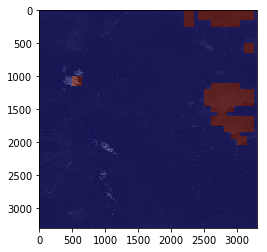

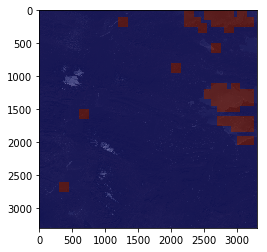

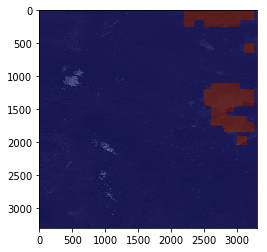

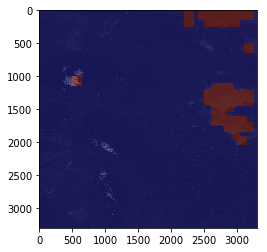

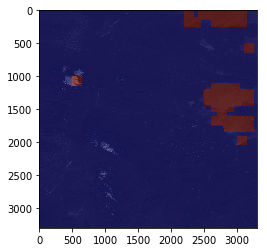

In [10]:
for im in res_muga_puruo:
    plt.imshow(np.array(im))
    plt.show()

### heatmaps